Задание 9 - построить графики


p = 0.1


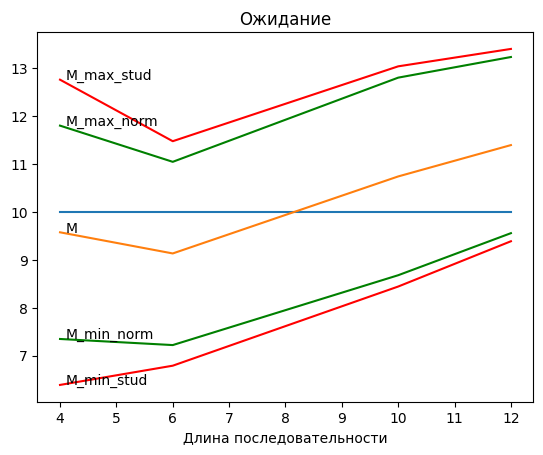

p = 0.05


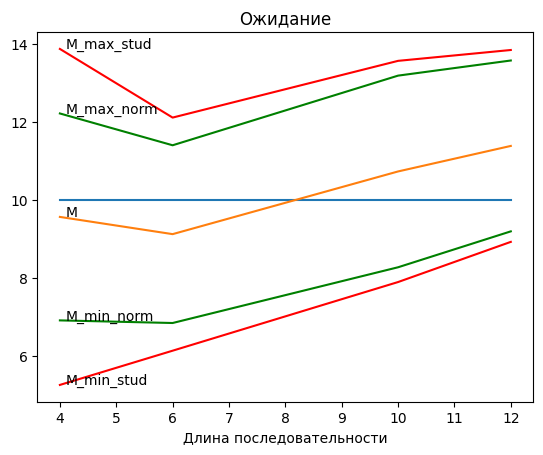

p = 0.02


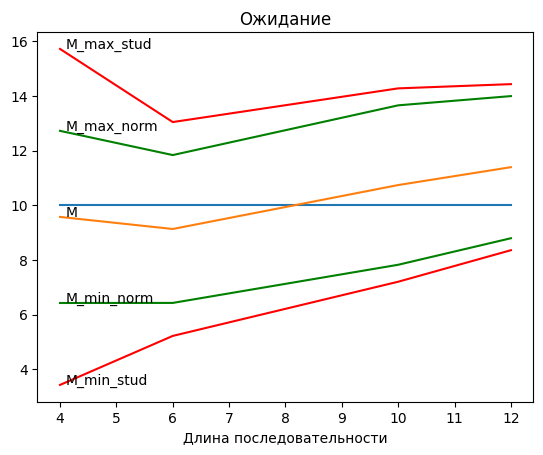

p = 0.01


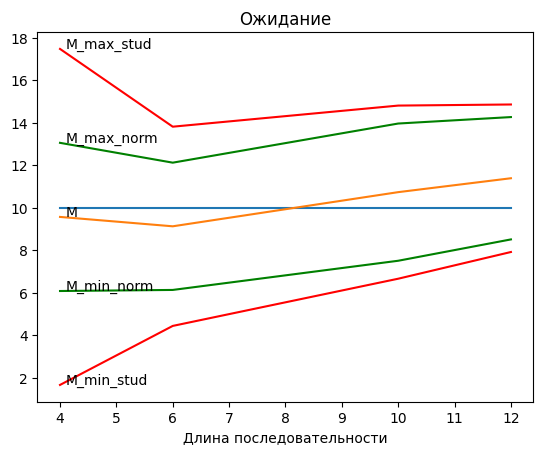

M среднее по выборкам 10.211325


In [7]:
from scipy.stats import norm, t, chi2

a = [
    [9.245, 10.172, 12.718, 6.167],
    [9.919, 12.095, 5.811, 5.706, 12.016, 9.259],
    [17.346, 5.909, 13.688, 6.508, 13.619, 5.948, 12.476, 7.664, 11.896, 12.354],
    [5.359, 13.891, 10.171, 9.256, 16.561, 10.498, 9.716, 14.094, 9.558, 18.492, 12.564, 6.576]
]



p = 0.1
P = [.1, .05, .02, .01]


import matplotlib.pyplot as plt
X = [len(a[i]) for i in range(4)]
#M[j] + t.ppf(1 - p/2, len(a[j]) - 1) * S[j] / len(a[j]) ** .5
for i in range(4):
    print(f"p = {P[i]}")
    p = P[i]
    plt.figure(i + 1)
    plt.plot(X, [10 for _ in range(4)])
    plt.plot(X, [M[j] - norm.ppf(1 - p/2, 0, 1) * S[j] / len(a[j]) ** .5 for j in range(4)], "g")
    plt.text(X[0] + .1, M[0] - norm.ppf(1 - p/2, 0, 1) * S[0] / len(a[0]) ** .5, "M_min_norm")
    plt.plot(X, [M[j] + norm.ppf(1 - p/2, 0, 1) * S[j] / len(a[j]) ** .5 for j in range(4)], "g")
    plt.text(X[0] + .1, M[0] + norm.ppf(1 - p/2, 0, 1) * S[0] / len(a[0]) ** .5, "M_max_norm")

    plt.plot(X, [M[j] - t.ppf(1 - p/2, len(a[j]) - 1) * S[j] / len(a[j]) ** .5 for j in range(4)], "r")
    plt.text(X[0] + .1, M[0] - t.ppf(1 - p/2, len(a[0]) - 1) * S[0] / len(a[0]) ** .5, "M_min_stud")
    plt.plot(X, [M[j] + t.ppf(1 - p/2, len(a[j]) - 1) * S[j] / len(a[j]) ** .5 for j in range(4)], "r")
    plt.text(X[0] + .1, M[0] + t.ppf(1 - p/2, len(a[0]) - 1) * S[0] / len(a[0]) ** .5, "M_max_stud")

    plt.plot(X, [M[j] for j in range(4)])
    plt.text(X[0] + .1, M[0], "M")

    plt.xlabel("Длина последовательности")
    plt.title("Ожидание")
    plt.show()

print(f"M среднее по выборкам {sum(M) / 4}")

p = 0.1


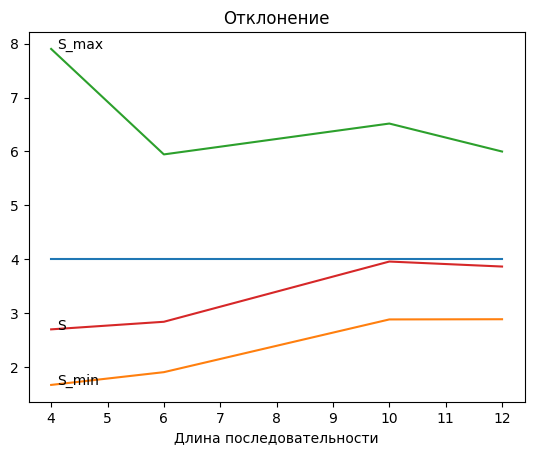

p = 0.05


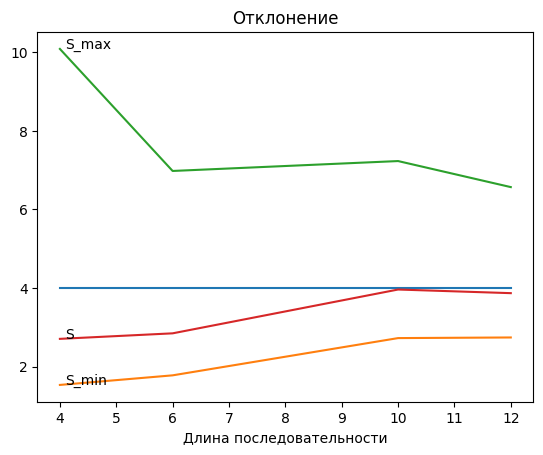

p = 0.02


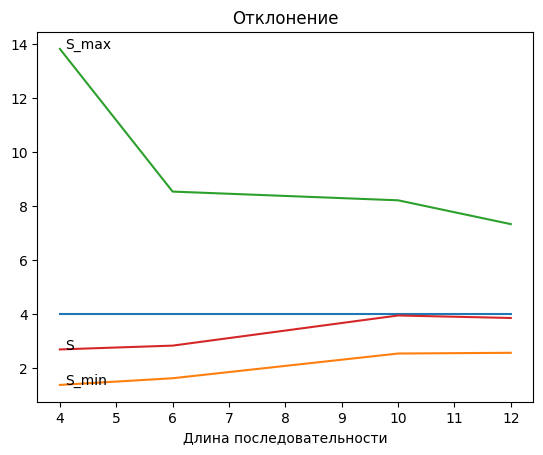

p = 0.01


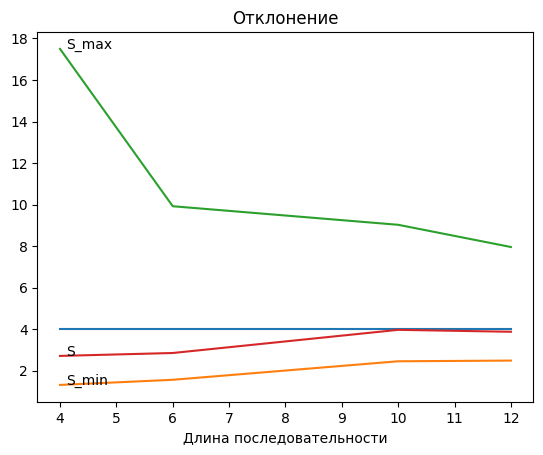

S среднее по выборкам 3.627119924954234


In [8]:
import matplotlib.pyplot as plt
X = [len(a[i]) for i in range(4)]

for i in range(4):
    print(f"p = {P[i]}")
    p = P[i]
    plt.figure(i + 1)
    plt.plot(X, [4 for _ in range(4)])
    plt.plot(X, [S[j] * ((len(a[j]) - 1) / chi2.ppf(1 - p/2, len(a[j]) - 1)) ** .5 for j in range(4)])
    plt.text(X[0] + .1, S[0] * ((len(a[0]) - 1) / chi2.ppf(1 - p/2, len(a[0]) - 1)) ** .5, "S_min")
    plt.plot(X, [S[j] * ((len(a[j]) - 1) / chi2.ppf(p/2, len(a[j]) - 1)) ** .5 for j in range(4)])
    plt.text(X[0] + .1, S[0] * ((len(a[0]) - 1) / chi2.ppf(p/2, len(a[0]) - 1)) ** .5, "S_max")
    plt.plot(X, [S[j] for j in range(4)])
    plt.text(X[0] + .1, S[0], "S")

    plt.xlabel("Длина последовательности")
    plt.title("Отклонение")
    plt.show()


print(f"S среднее по выборкам {((3 * S[0] * S[0] + 5 * S[1] * S[1] + 9 * S[2] * S[2] + 11 * S[3] * S[3]) / 28) ** .5}")